## PREDICT CHRONIC KIDNEY DISEASE

In [1]:
#numpy
import numpy as np
#pandas
import pandas as pd
from pandas import DataFrame
#seaborn
import seaborn as sns
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#feature extraction
from sklearn.feature_extraction import DictVectorizer
#cross Val Scrore
from sklearn.model_selection import cross_val_score
#Dataframemapper, categorical imputer
#from sklearn_pandas import CategoricalImputer
#Imputer
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Imputer
# Categorical data
from sklearn.preprocessing import LabelEncoder
#confusion matrix
from sklearn.metrics import roc_curve, auc,accuracy_score, classification_report, confusion_matrix
#model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Data Preparation & Data cleaning
* Load the data, inspect missing values, convert data types as required, check for the data formats ,
  convert target to numerical
* We infer from dataset that , all datatypes have datatype object.
* Also, there are missing values "?" and we have replaced all to "null" values as it's readable for pandas.

In [2]:
#Loading the dataset and replaced "?" to null
pd.set_option('display.max_columns', 25)
df = pd.read_csv('kidneyChronic.csv', na_values=["?"])
df = df.applymap(lambda x:np.nan if x == '\t?' else x)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


* Analysing the structure of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null object
wbcc     294 non-null object
rbcc     269 non-null object
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(11), object(14)
memory usage: 78.2+ KB


In [4]:
# Describe all numerical data from the dataset.
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
#Describe all categorical data
df.describe(include=['O'])

,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,248,335,396,396,329,294,269,398,398,398,399,399,399,400
unique,2,2,2,2,43,91,45,2,5,3,2,2,2,2
top,normal,normal,notpresent,notpresent,52,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,250


* Below is the count of missing values in each attribute.

In [6]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

##### Converting attribute columns to numeric and object datatypes.

In [7]:
# numerical columns
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
#num_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc']

In [8]:
# categorical columns
cate_cols = df.columns.drop('class').drop(num_cols)
# display categorical columns
df[cate_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
dtypes: object(10)
memory usage: 31.3+ KB


In [9]:
# convert to numeric 
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
age     391 non-null float64
bp      388 non-null float64
sg      353 non-null float64
al      354 non-null float64
su      351 non-null float64
bgr     356 non-null float64
bu      381 non-null float64
sc      383 non-null float64
sod     313 non-null float64
pot     312 non-null float64
hemo    348 non-null float64
pcv     329 non-null float64
wbcc    294 non-null float64
rbcc    269 non-null float64
dtypes: float64(14)
memory usage: 43.8 KB


* Display categorical columns and check the number of unique values

In [10]:
cate_cols

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

* check the number of unique values

In [11]:
df[cate_cols].apply(lambda x: x.nunique(), axis=0)

rbc      2
pc       2
pcc      2
ba       2
htn      2
dm       5
cad      3
appet    2
pe       2
ane      2
dtype: int64

* Problem found in attribute 'dm' and 'cad' contains string values with extra space and other values
* Also, same way 'cad' contain string values other than 'yes/no/nan' as below

In [12]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [13]:
df['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [14]:
df['dm'].dtype

dtype('O')

##### Deleting the extra space,  if not deleted, an error will be caused in pipeline as X_train and X_test dimension do not match 

In [15]:
#delete the space in 'dm' and 'cad'
df['dm'] =df['dm'].str.strip()
df['cad'] =df['cad'].str.strip()

* validating the number of unique values. 

In [16]:
df['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [17]:
df['cad'].unique()

array(['no', 'yes', nan], dtype=object)

* One can see from above , this has been cleaned and it is unique.

In [18]:
#unique attribute of class
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

#### Convert categorical finall class to numerical

In [19]:
#convert categorical target to numerical
df['class'] = df['class'].apply(lambda x:1 if x=='ckd' else 0)

#display the head of categorical data
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

* Now, in X dataset, we have missing values, we need to do preprocessing

### Data Preprocessing
* We are performing preprocessing, by using sklearn Imputer to impute missing numerical and categorical missing values.
* Define categorical imputer using the most frequent value used.
* Define Numerical imputer using the median value used.

In [20]:
#Splitting the data into X (independent attributes) and Y for class
X = df.iloc[:, 0:24].values
y = df.iloc[:, 24].values
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [21]:
from sklearn.impute import SimpleImputer
imp_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#from age to su,
imp_numerical = imp_numerical.fit(X[:,0:5])
X[:,0:5] = imp_numerical.transform(X[:,0:5])
#from rbc to ba
imp_categorical = imp_categorical.fit(X[:,5:9])
X[:,5:9] = imp_categorical.transform(X[:,5:9])
#from bgr to rbcc
imp_numerical= imp_numerical.fit(X[:, 9:18])
X[:, 9:18] = imp_numerical.transform(X[:, 9:18])
#from htn to ane
imp_categorical = imp_categorical.fit(X[:, 18:24])
X[:, 18:24] = imp_categorical.transform(X[:, 18:24])


dff = pd.DataFrame({'age' :X[:,0], 'bp':X[:,1],'sg':X[:,2],'al':X[:,3],'su':X[:,4],'rbc':X[:,5]
                    ,'pc':X[:,6],'pcc':X[:,7],'ba':X[:,8],'bgr':X[:,9],'bu':X[:,10],'sc':X[:,11]
                    ,'sod':X[:,12],'pot':X[:,13],'hemo':X[:,14],'pcv':X[:,15],'wbcc':X[:,16]
                    ,'rbcc':X[:,17],'htn':X[:,18],'dm':X[:,19],'cad':X[:,20],'appet':X[:,21]
                    ,'pe':X[:,22],'ane':X[:,23]})
dff.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48,80,1.02,1,0,normal,normal,notpresent,notpresent,121,36,1.2,137.529,4.62724,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,7,50,1.02,4,0,normal,normal,notpresent,notpresent,148.037,18,0.8,137.529,4.62724,11.3,38,6000,4.70743,no,no,no,good,no,no
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,137.529,4.62724,9.6,31,7500,4.70743,no,yes,no,poor,no,yes
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,137.529,4.62724,11.6,35,7300,4.6,no,no,no,good,no,no


### Change the categorical to numerical mapping

In [22]:
labelencoder = LabelEncoder()
dff.iloc[:,5] = labelencoder.fit_transform(dff.iloc[:,5])
dff.iloc[:,6] = labelencoder.fit_transform(dff.iloc[:,6])
dff.iloc[:,7] = labelencoder.fit_transform(dff.iloc[:,7])
dff.iloc[:,8] = labelencoder.fit_transform(dff.iloc[:,8].astype(str))
dff.iloc[:,18] = labelencoder.fit_transform(dff.iloc[:,18])
dff.iloc[:,19] = labelencoder.fit_transform(dff.iloc[:,19])
dff.iloc[:,20] = labelencoder.fit_transform(dff.iloc[:,20])
dff.iloc[:,21] = labelencoder.fit_transform(dff.iloc[:,21])
dff.iloc[:,22] = labelencoder.fit_transform(dff.iloc[:,22])
dff.iloc[:,23] = labelencoder.fit_transform(dff.iloc[:,23].astype(str))
dff

X_data = dff
Y_data =labelencoder.fit_transform(y.astype(str))
X_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48,80,1.02,1,0,1,1,0,0,121,36,1.2,137.529,4.62724,15.4,44,7800,5.2,1,1,0,0,0,0
1,7,50,1.02,4,0,1,1,0,0,148.037,18,0.8,137.529,4.62724,11.3,38,6000,4.70743,0,0,0,0,0,0
2,62,80,1.01,2,3,1,1,0,0,423,53,1.8,137.529,4.62724,9.6,31,7500,4.70743,0,1,0,1,0,1
3,48,70,1.005,4,0,1,0,1,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1,0,0,1,1,1
4,51,80,1.01,2,0,1,1,0,0,106,26,1.4,137.529,4.62724,11.6,35,7300,4.6,0,0,0,0,0,0


#### Normalising the data to a scaled range

In [23]:
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(dff)
dff.loc[:,:] = scaled_values
dff.head()

/Users/dexter/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,0.088575,0.010582,0.839298,0.047803,0.836735,0.777778,0.231405,0.525424,1.0,1.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.269309,0.042362,0.005291,0.839298,0.047803,0.557823,0.644444,0.157025,0.441938,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,0.132221,0.018519,0.839298,0.047803,0.442177,0.488889,0.219008,0.441938,0.0,1.0,0.0,1.0,0.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,0.062901,0.013228,0.839298,0.047803,0.578231,0.577778,0.210744,0.423729,0.0,0.0,0.0,0.0,0.0,0.0


#### From the below table we can infer that  there are no missing values and data is clean. 

In [44]:
dff.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

### Spliting the dataset

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.30, random_state = 42)


In [25]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


280 120 280 120


### AUC curve

In [26]:
### Function to plot AUC Curve
def auc_scorer(clf, X, y, model): 
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

In [27]:
print(X_train.shape)
print(X_test.shape)


(280, 24)
(120, 24)


### KNN model

KNN accuracy = 99.16666666666667


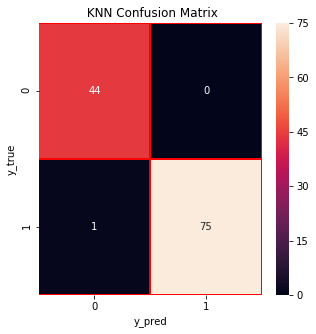

In [28]:
score=[] #these variables will be used to show the algorithm name and its successes.
algorithms=[] 
#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.predict(X_test)
score.append(knn.score(X_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(X_test,y_test)*100)

#Confusion Matrix
y_pred=knn.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

### Naive Bayes Model

Naive Bayes accuracy = 95.0


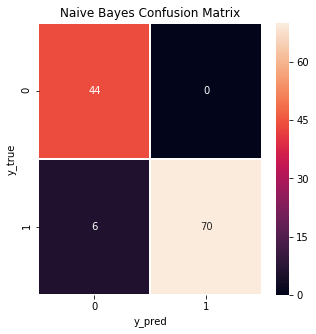

In [41]:
nb=GaussianNB()

#Training
nb.fit(X_train,y_train)
#Test
score.append(nb.score(X_test,y_test)*100)
algorithms.append("Naive-Bayes")
print("Naive Bayes accuracy =",nb.score(X_test,y_test)*100)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

### Support Vector Machine Confusion matrix

/Users/dexter/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm test accuracy = 96.66666666666667


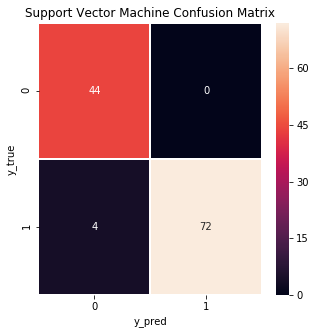

In [30]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
score.append(svm.score(X_test,y_test)*100)
algorithms.append("Support Vector Machine")
print("svm test accuracy =",svm.score(X_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

### Decision Tree Classifier

Decision Tree accuracy: 97.5


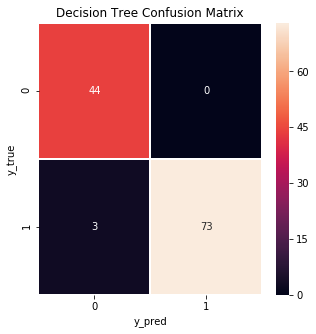

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Decision Tree accuracy:",dt.score(X_test,y_test)*100)
score.append(dt.score(X_test,y_test)*100)
algorithms.append("Decision Tree")

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

### Random forest Classifier

Random Forest accuracy = 100.0


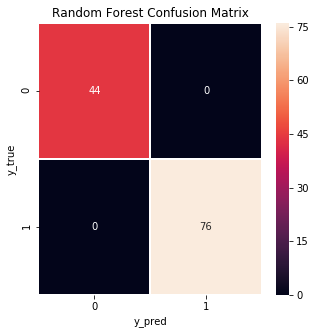

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
score.append(rf.score(X_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(X_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

### Logistic Regression Confusion matrix

/Users/dexter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression accuracy 97.5


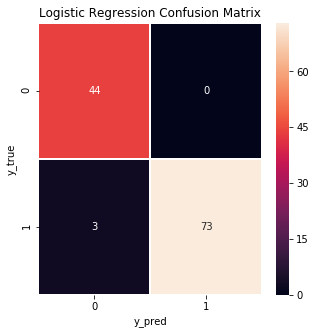

In [43]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
score.append(lr.score(X_test,y_test)*100)
algorithms.append("Logistic Regression")
print("Logistic regression accuracy {}".format(lr.score(X_test,y_test)*100))
#Confusion Matrix
y_pred=lr.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### Correlation of Parameters

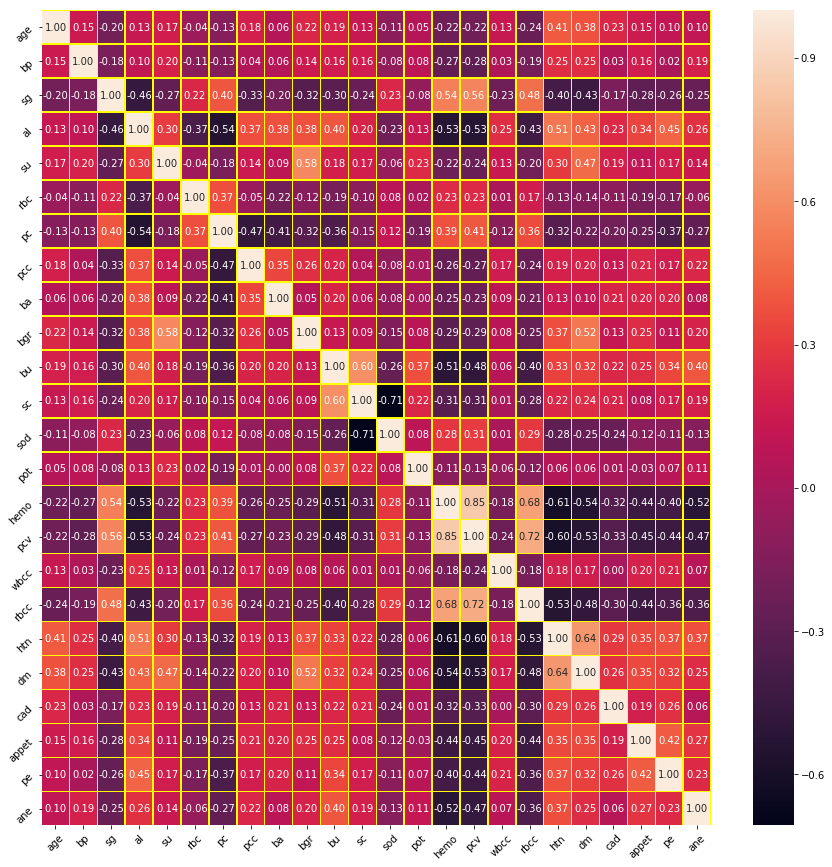

In [34]:
#HEAT MAP #correlation of parameters 
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="yellow")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


/Users/dexter/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion Matrix:
[[44  0]
 [ 0 76]]


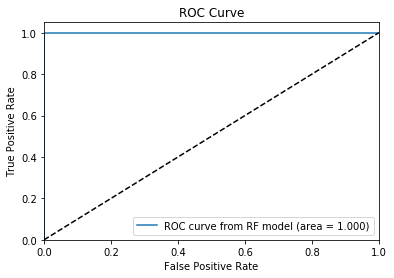

Best parameters:
{'class_weight': 'balanced', 'max_depth': 4, 'n_estimators': 15, 'random_state': 323}


In [35]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[323]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


### Feature Selection

Feature ranking:
1. feature 15 (0.176196)
2. feature 2 (0.164814)
3. feature 11 (0.140887)
4. feature 14 (0.129129)
5. feature 12 (0.067655)
6. feature 17 (0.063922)
7. feature 3 (0.057821)
8. feature 9 (0.046108)
9. feature 19 (0.043017)
10. feature 10 (0.026264)
11. feature 6 (0.014330)
12. feature 23 (0.013824)
13. feature 18 (0.012859)
14. feature 0 (0.011930)
15. feature 1 (0.009569)
16. feature 4 (0.006636)
17. feature 16 (0.006193)
18. feature 21 (0.004385)
19. feature 22 (0.003114)
20. feature 13 (0.000704)
21. feature 5 (0.000642)
22. feature 8 (0.000000)
23. feature 7 (0.000000)
24. feature 20 (0.000000)


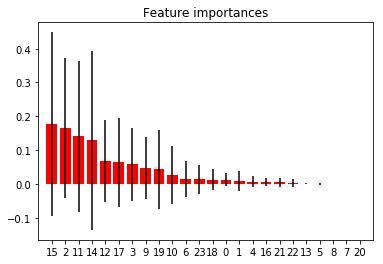

In [36]:
importances = clf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_best.estimators_],
             axis=0); std
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Text(0.5, 1.0, 'Feature Importance')

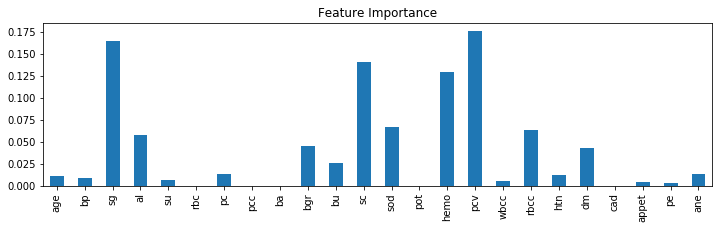

In [37]:
plt.figure(figsize=(12,3))
features = X_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

In [38]:
list_to_fill = X_test.columns[feature_series>0]
print(list_to_fill)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'pe',
       'ane'],
      dtype='object')
